In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
backendQasm = Aer.get_backend('qasm_simulator')

#initialize image in terms of theta angle values
theta = [math.pi/2,math.pi/2,math.pi/2,math.pi/2]

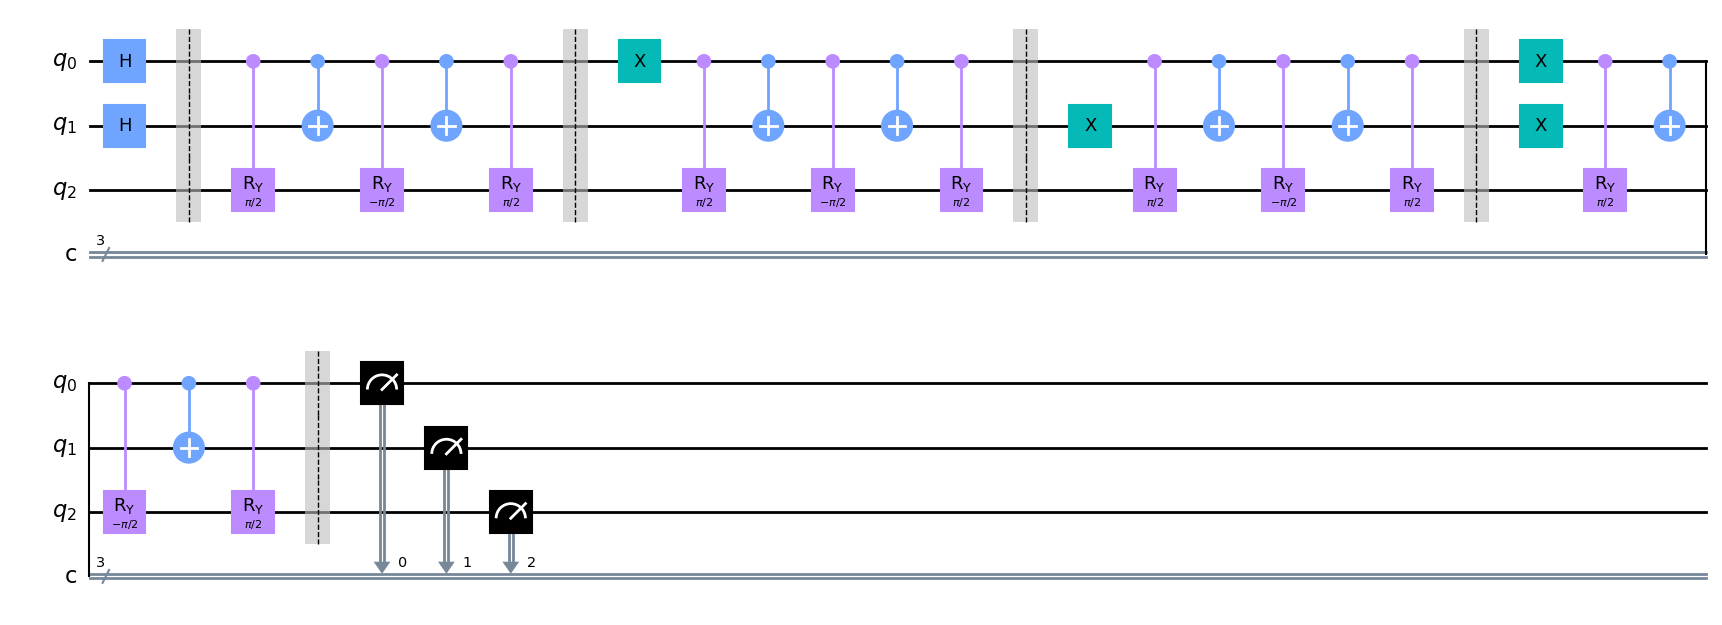

In [3]:
qc = QuantumCircuit(3,3)

qc.h(0)
qc.h(1)


for pixel in range(4):
    
    qc.barrier()
    #pixel identification
    if(pixel%2 != 0):
        qc.x(0)
    if(int(pixel/2)%2 != 0):
        qc.x(1)
    
    #R(2theta) unitary operation
    qc.cry(theta[pixel],0,2)
    qc.cx(0,1)
    qc.cry(-theta[pixel],0,2)
    qc.cx(0,1)
    qc.cry(theta[pixel],0,2)
    
qc.barrier()
qc.measure([0,1,2],[0,1,2])
qc.draw()

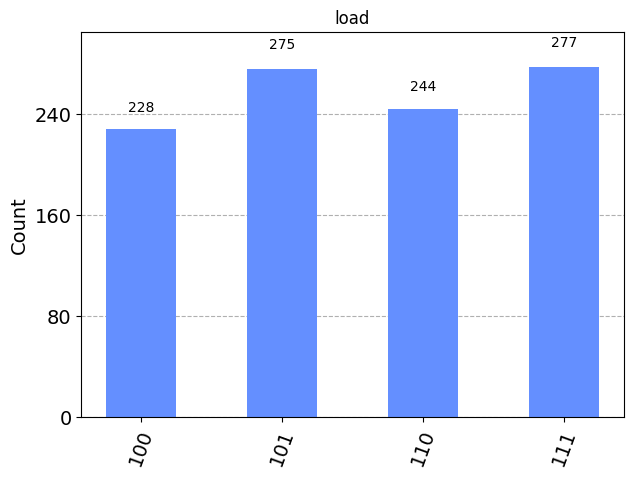

In [4]:
transpile_qc = transpile(qc, backendQasm)
result = backendQasm.run(transpile_qc).result()
counts = result.get_counts(transpile_qc)
plot_histogram(counts, title = "load")